In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading data
df= pd.read_csv("../input/world-happiness-report-2021/world-happiness-report.csv")

In [3]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [5]:
df.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

In [6]:
df.shape

(1949, 11)

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [8]:
df.fillna(0,inplace= True)

In [9]:
#creating total score column
df["Total_score"]=(df["Life Ladder"]+df["Log GDP per capita"]+df["Social support"]+df["Healthy life expectancy at birth"]+df["Freedom to make life choices"]+df["Generosity"]+df["Positive affect"])- (df["Perceptions of corruption"]+df["Negative affect"])

In [10]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Total_score
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,62.609
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,64.060
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,64.901
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,64.164
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,64.682


<AxesSubplot:ylabel='Country name'>

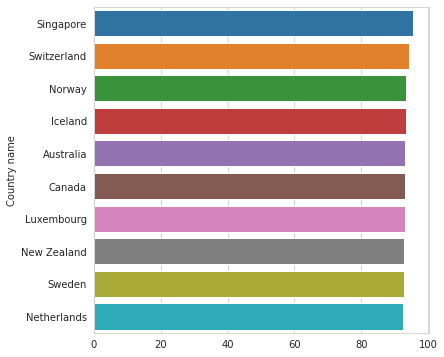

In [11]:
#Top 10 happiest countries based on overall total score
x= df.groupby("Country name")["Total_score"].mean().sort_values(ascending= False).head(10)
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
sns.barplot(x.values,x.index)


<AxesSubplot:ylabel='Country name'>

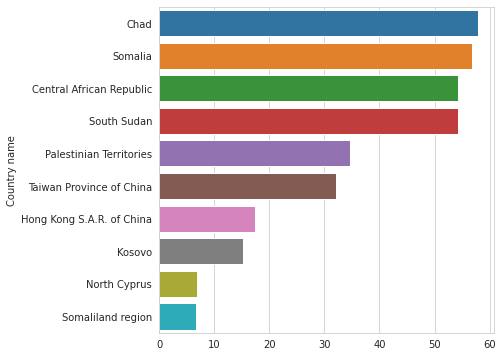

In [12]:
#Least 10 happiest countries based on overall total score
x= df.groupby("Country name")["Total_score"].mean().sort_values(ascending= False).tail(10)
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
sns.barplot(x.values,x.index)

<AxesSubplot:xlabel='Log GDP per capita', ylabel='Total_score'>

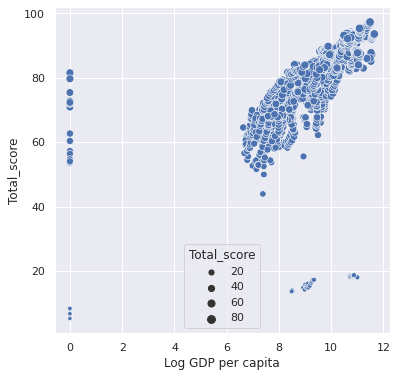

In [45]:
#total score based on gdp per capita
plt.figure(figsize=(6,6))
sns.scatterplot(x="Log GDP per capita",y= "Total_score",data= df ,size= "Total_score")

<Figure size 720x720 with 0 Axes>

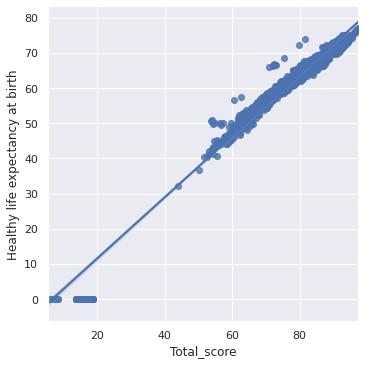

In [42]:
#total score based on healthy life expectancy at birth
plt.figure(figsize=(10,10))
sns.lmplot(x="Total_score",y= "Healthy life expectancy at birth",data= df)
plt.show()

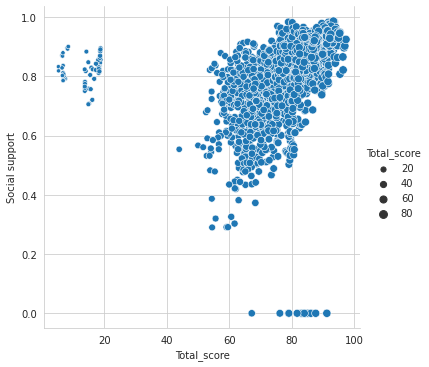

In [28]:
#total score based on social support
sns.relplot(x="Total_score",y= "Social support",data= df,size= "Total_score",hue )

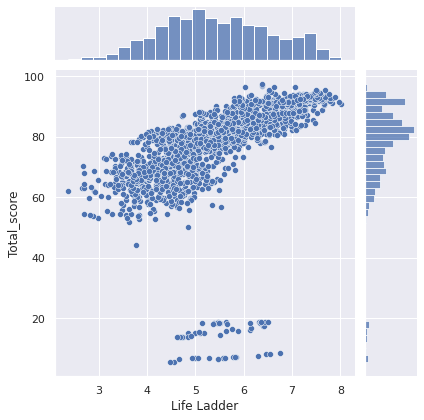

In [30]:
#total score based on life ladder
sns.set_theme(style="darkgrid")
sns.jointplot(x="Life Ladder",y= "Total_score",data= df)

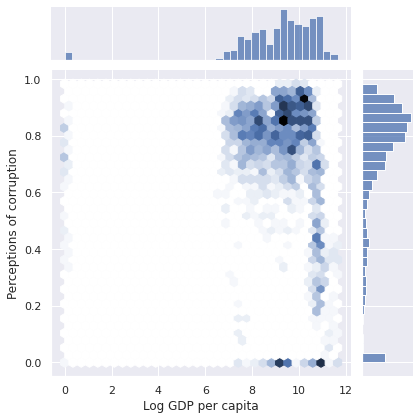

In [57]:
#GDP per capita and perceptions of corruption correlation
sns.set_theme(style="darkgrid")
sns.jointplot(x="Log GDP per capita",y= "Perceptions of corruption",data= df,kind= "hex")

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Positive affect'>

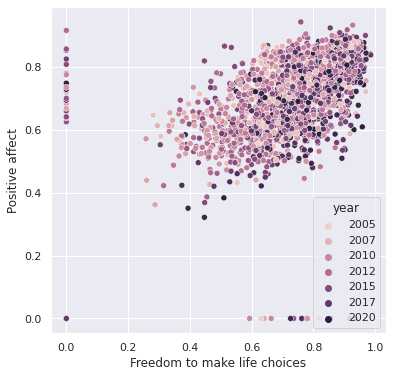

In [40]:
#positive affects based on freedom to make life choices
plt.figure(figsize=(6,6))
sns.scatterplot(x="Freedom to make life choices",y= "Positive affect",data= df ,hue="year")

<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Negative affect'>

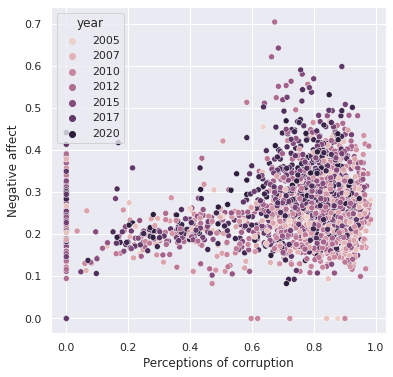

In [43]:
#negative affect based on corruption perceptions
plt.figure(figsize=(6,6))
sns.scatterplot(x="Perceptions of corruption",y= "Negative affect",data= df ,hue="year")

<AxesSubplot:xlabel='Log GDP per capita', ylabel='Positive affect'>

<Figure size 1440x360 with 0 Axes>

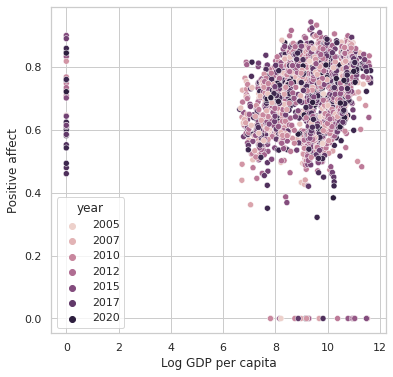

In [91]:
#positive affect based on GDP per capita
plt.figure(figsize=(20,5))
plt.figure(figsize=(6,6))
sns.scatterplot(x="Log GDP per capita",y= "Positive affect",data= df ,hue="year")


<AxesSubplot:xlabel='year'>

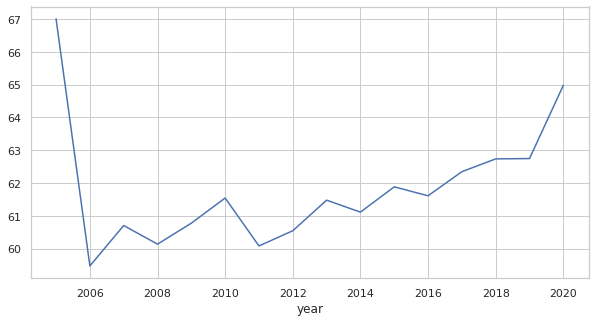

In [87]:
plt.figure(figsize=(10,5))

x= df.groupby("year")["Healthy life expectancy at birth"].mean()
sns.lineplot(x.index,x.values)

<AxesSubplot:xlabel='year'>

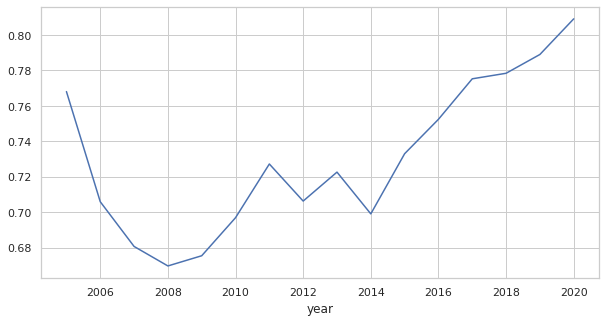

In [86]:
plt.figure(figsize=(10,5))
x= df.groupby("year")["Freedom to make life choices"].mean()
sns.lineplot(x.index,x.values)

<AxesSubplot:xlabel='year', ylabel='Log GDP per capita'>

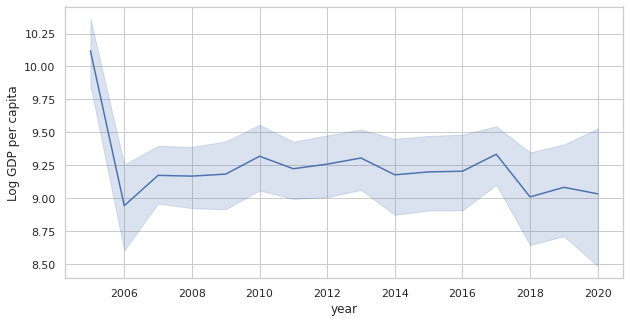

In [85]:
plt.figure(figsize=(10,5))
sns.lineplot(x= "year",y= "Log GDP per capita",data= df)

<AxesSubplot:xlabel='year', ylabel='Life Ladder'>

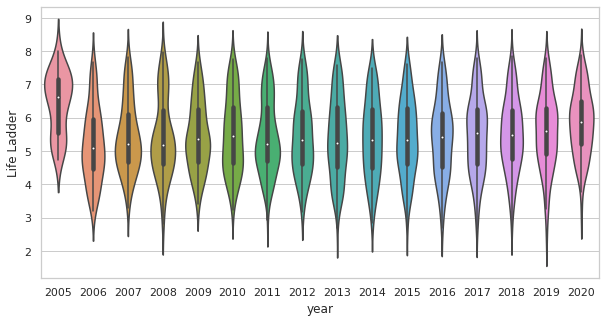

In [81]:
plt.figure(figsize=(10,5))
sns.violinplot(x= "year",y= "Life Ladder",data= df)

<AxesSubplot:xlabel='year', ylabel='Healthy life expectancy at birth'>

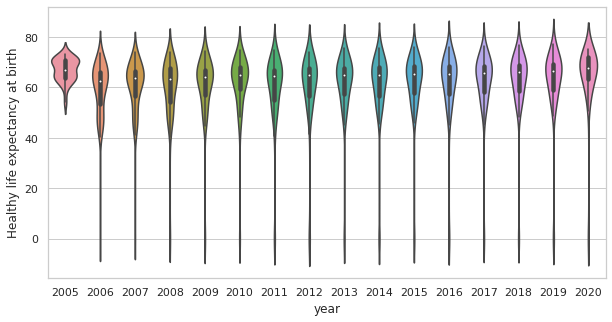

In [83]:
plt.figure(figsize=(10,5))
sns.violinplot(x= "year",y= "Healthy life expectancy at birth",data= df)

<AxesSubplot:xlabel='year', ylabel='Freedom to make life choices'>

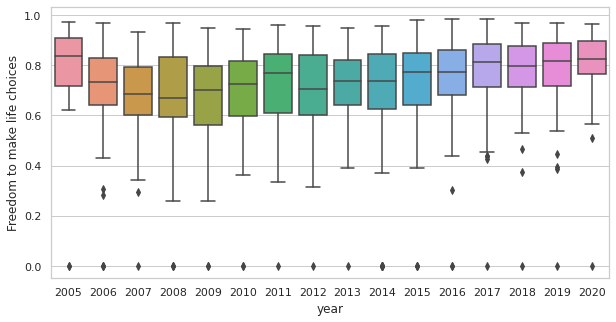

In [84]:
plt.figure(figsize=(10,5))
sns.boxplot(x= "year",y= "Freedom to make life choices",data= df)

<AxesSubplot:xlabel='year', ylabel='Generosity'>

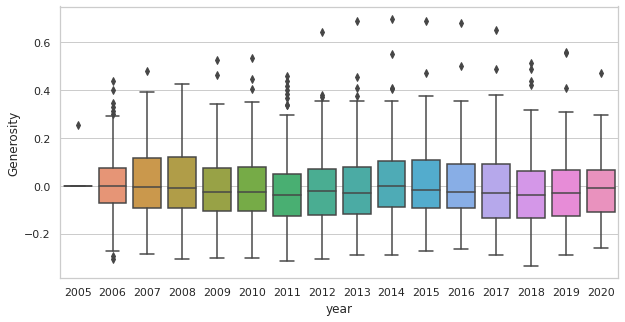

In [92]:
plt.figure(figsize=(10,5))
sns.boxplot(x= "year",y= "Generosity",data= df)

In [94]:
#top 10 countries having best freedom to make life choices
df.groupby("Country name")["Freedom to make life choices"].mean().sort_values(ascending= False).head(10)


Country name
Norway         0.954400
Denmark        0.945067
Finland        0.939692
Iceland        0.931500
Sweden         0.929600
Canada         0.927933
Switzerland    0.924700
New Zealand    0.923143
Australia      0.921714
Somalia        0.919667
Name: Freedom to make life choices, dtype: float64

In [95]:
#top 10 countries having least freedom to make life choices
df.groupby("Country name")["Freedom to make life choices"].mean().sort_values(ascending= False).tail(10)

Country name
Chad                      0.499500
Bosnia and Herzegovina    0.497615
South Sudan               0.493750
Iraq                      0.477917
Madagascar                0.469091
Haiti                     0.461636
Angola                    0.456250
Burundi                   0.450800
Algeria                   0.389375
Cuba                      0.281000
Name: Freedom to make life choices, dtype: float64

<AxesSubplot:ylabel='Country name'>

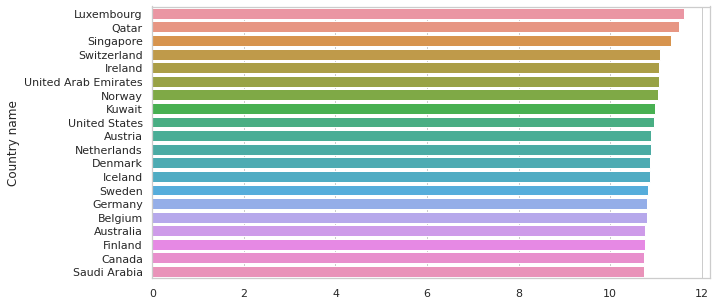

In [104]:
#top 20 countries having best GDP per capita 
plt.figure(figsize=(10,5))
x= df.groupby("Country name")["Log GDP per capita"].mean().sort_values(ascending= False).head(20)
sns.barplot(x.values,x.index)

<AxesSubplot:ylabel='Country name'>

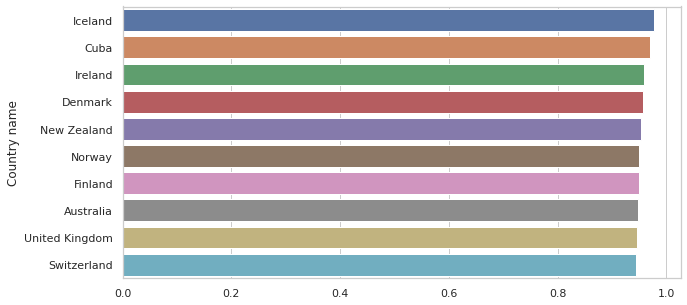

In [109]:
#top 10 countries having best social support
plt.figure(figsize=(10,5))
x= df.groupby("Country name")["Social support"].mean().sort_values(ascending= False).head(10)
sns.barplot(x.values,x.index)

<AxesSubplot:ylabel='Country name'>

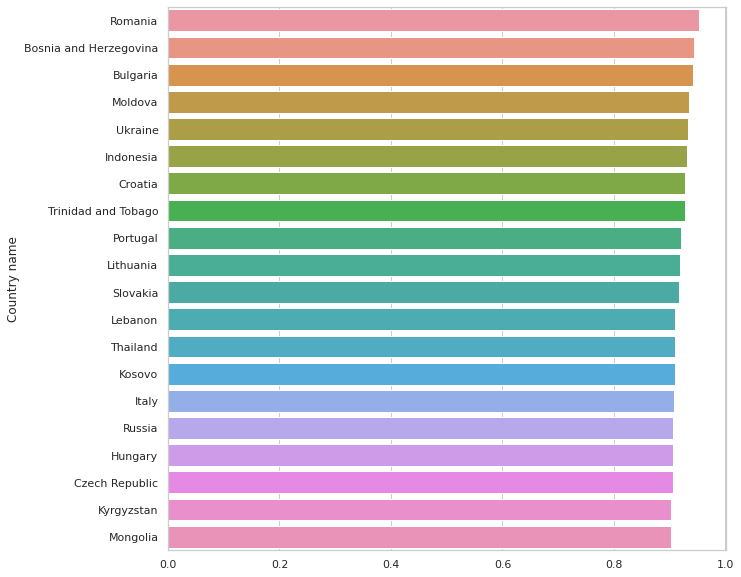

In [112]:
#top 20 countries having highest Perceptions of corruption
plt.figure(figsize=(10,10))
x= df.groupby("Country name")["Perceptions of corruption"].mean().sort_values(ascending= False).head(20)
sns.barplot(x.values,x.index)

<AxesSubplot:xlabel='year', ylabel='Log GDP per capita'>

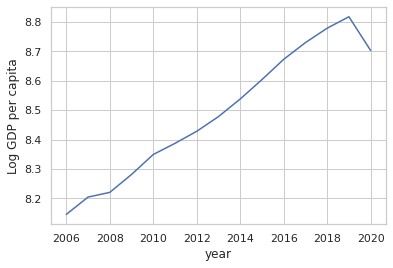

In [116]:
#INDIA
#gdp per capita over the years for India
x= df[df["Country name"]=="India"]
sns.lineplot(x= "year",y= "Log GDP per capita",data= x)

<AxesSubplot:xlabel='year', ylabel='Healthy life expectancy at birth'>

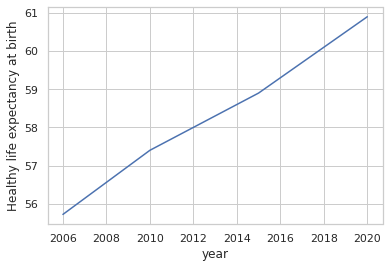

In [117]:
#Healthy life expectancy at birth over the years for India
x= df[df["Country name"]=="India"]
sns.lineplot(x= "year",y= "Healthy life expectancy at birth",data= x)

<AxesSubplot:xlabel='year', ylabel='Perceptions of corruption'>

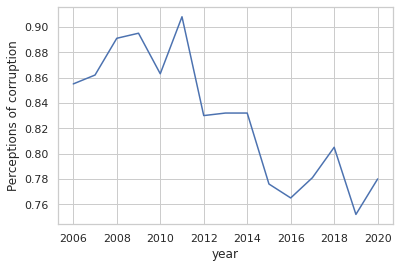

In [118]:
#Perceptions of corruption over the years for India
x= df[df["Country name"]=="India"]
sns.lineplot(x= "year",y= "Perceptions of corruption",data= x)

<AxesSubplot:xlabel='year', ylabel='Total_score'>

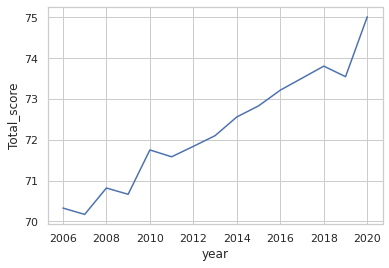

In [119]:
#Total score over the years for India
x= df[df["Country name"]=="India"]
sns.lineplot(x= "year",y= "Total_score",data= x)